In [1]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient

# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="https://detect.roboflow.com",
    api_key="HlvDCo3IeHa9spFrfIct"
)


In [4]:
from roboflow import Roboflow

rf = Roboflow(api_key="HlvDCo3IeHa9spFrfIct")
project = rf.workspace().project("mess-e9kep")
model = project.version("1").model

loading Roboflow workspace...
loading Roboflow project...


In [6]:
job_id, signed_url, expire_time = model.predict_video(
    "WhatsApp Video 2024-04-21 at 9.03.07 PM.mp4",
    fps=5,
    prediction_type="batch-video",
)

results = model.poll_until_video_results(job_id)

print(results)

Checking for video inference results for job 830b3876-fbaa-4065-89ce-9941b5960c19 every 60s
(0s): Checking for inference results
{'frame_offset': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330], 'time_offset': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6, 4.8, 5.0, 5.2, 5.4, 5.6, 5.8, 6.0, 6.2, 6.4, 6.6, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8, 8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0, 10.2, 10.4, 10.6, 10.8, 11.0, 11.2, 11.4, 11.6, 11.8, 12.0, 12.2, 12.4, 12.6, 12.8, 13.0, 13.2], 'mess-e9kep': [{'time': 0.06169570703059435, 'image': {'width': 596, 'height': 336}, 'predictions': []}, {'time': 0.061734866932965815, 'image': {'width': 596, 'height': 

In [5]:
import cv2

# Read the image file
image = cv2.imread("1.jpg")

# Check if the image was read successfully
if image is None:
    print("Could not open or find the image.")
else:
    print("Image read successfully.")


Image read successfully.


In [ ]:
import cv2
import json
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient  

# Step 1: Initialize the client for the inference model
api_key = "HlvDCo3IeHa9spFrfIct"  
api_url = "https://detect.roboflow.com"  
client = InferenceHTTPClient(api_url=api_url, api_key=api_key)

# Specify the model ID to use for inference
model_id = 'mall_escalator_system/1'  

# Step 2: Read the image using OpenCV
image_path = '2.jpg'  
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image is None:
    print(f"Failed to load image from {image_path}")
else:
    # Step 3: Perform inference using the specified model
    results = client.infer(image_rgb, model_id=model_id)
    
    if isinstance(results, str):
        results = json.loads(results)
    
    # Debug: print inference results
    print("Results:")
    print(results)

    # Create a figure and axes for Matplotlib
    fig, ax = plt.subplots()

    ax.imshow(image_rgb)
    
    # Step 4: Process the results
    for result in results:
        if isinstance(result, dict):
            bbox = result.get('bbox')
            class_label = result.get('label')
            confidence = result.get('confidence', 0)
            if bbox and len(bbox) == 4:
                x, y, width, height = bbox
                bottom_right = (x + width, y + height)
                print(f"Bounding box: {bbox}, Class: {class_label}, Confidence: {confidence:.2f}")
                rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(rect)
                label_text = f"{class_label} ({confidence:.2f})"
                ax.text(x, y - 5, label_text, color='g', fontsize=9, va='bottom', ha='left')
    ax.set_title('Annotated Image')
    plt.show()

In [ ]:
print("Results:")
print(results)

A kid is accompanied by an adult in the image.


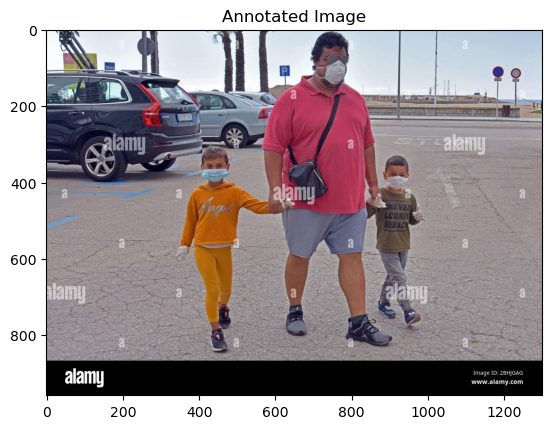

In [11]:
import cv2
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient  

api_key = "HlvDCo3IeHa9spFrfIct"  
api_url = "https://detect.roboflow.com"  
client = InferenceHTTPClient(api_url=api_url, api_key=api_key)
model_id = 'mall_escalator_system/1'  

image_path = '3.jpg'  
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image is None:
    print(f"Failed to load image from {image_path}")
else:
    results = client.infer(image_rgb, model_id=model_id)

    fig, ax = plt.subplots()

    ax.imshow(image_rgb)

    kids_present = False
    adults_present = False

    for result in results:
        if isinstance(result, dict):
            bbox = result.get('bbox')
            class_label = result.get('label')
            confidence = result.get('confidence', 0)

            if bbox and len(bbox) == 4:
                x, y, width, height = bbox
                
                if class_label == "kids":
                    kids_present = True
                elif class_label == "adult":
                    adults_present = True
                
                rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(rect)

                label_text = f"{class_label} ({confidence:.2f})"
                ax.text(x, y - 5, label_text, color='g', fontsize=9, va='bottom', ha='left')

    if kids_present and adults_present:
        print("No adult accompanying a kid was found in the image.")
    else:
        print("A kid is accompanied by an adult in the image.")
    ax.set_title('Annotated Image')
    plt.show()

No adult accompanying a kid was found in the image.


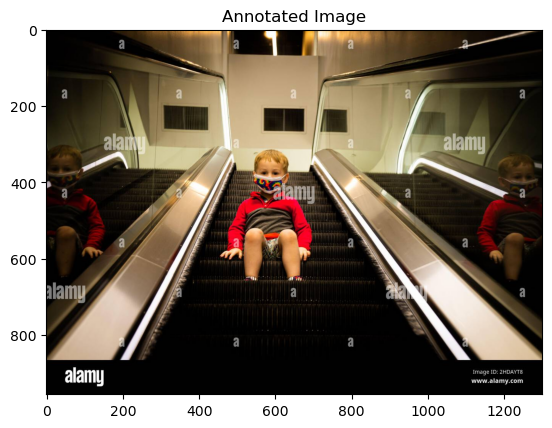

In [12]:
import cv2
import matplotlib.pyplot as plt
from inference_sdk import InferenceHTTPClient  

api_key = "HlvDCo3IeHa9spFrfIct"  
api_url = "https://detect.roboflow.com"  
client = InferenceHTTPClient(api_url=api_url, api_key=api_key)
model_id = 'mall_escalator_system/1'  

image_path = '4.jpg'  
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

if image is None:
    print(f"Failed to load image from {image_path}")
else:
    results = client.infer(image_rgb, model_id=model_id)

    fig, ax = plt.subplots()

    ax.imshow(image_rgb)

    kids_present = False
    adults_present = False

    for result in results:
        if isinstance(result, dict):
            bbox = result.get('bbox')
            class_label = result.get('label')
            confidence = result.get('confidence', 0)

            if bbox and len(bbox) == 4:
                x, y, width, height = bbox
                
                if class_label == "kids":
                    kids_present = True
                elif class_label == "adult":
                    adults_present = True
                
                rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(rect)

                label_text = f"{class_label} ({confidence:.2f})"
                ax.text(x, y - 5, label_text, color='g', fontsize=9, va='bottom', ha='left')

    if kids_present and adults_present:
        print("A kid is accompanied by an adult in the image.")
    else:
        print("No adult accompanying a kid was found in the image.")
    ax.set_title('Annotated Image')
    plt.show()
    